In [1]:
import numpy as np

# Try float32
v32 = np.fromfile('/home/elahed/users/elahe/project_check/Datasets/neu_4f22xw93j/DATASET3_4_1/DATASET3_4_1/802.11ax/OTA20210721-201220_0.bin', dtype=np.float32, count=10)
print(v32)  # should be floats in ≈[–1,1]

# Try int16
v16 = np.fromfile('/home/elahed/users/elahe/project_check/Datasets/neu_4f22xw93j/DATASET3_4_1/DATASET3_4_1/802.11ax/OTA20210721-201220_0.bin', dtype=np.int16, count=10)
print(v16)  # will be large integers if you mis‐guessed


[ 1.2920300e+34  9.4618696e-01  6.4449456e+37  1.1410705e+00
  1.1976359e+02  1.1662211e+00  5.8365997e-05 -1.2231827e+00
  2.2627487e-33  1.3013362e+00]
[ 16711  30751  14671  16242  -3570  32321   3737  16274 -30987  17135]


In [2]:
import numpy as np

raw = np.fromfile('/home/elahed/users/elahe/project_check/Datasets/neu_4f22xw93j/DATASET3_4_1/DATASET3_4_1/802.11ax/OTA20210721-201220_0.bin', dtype=np.int16)
i   = raw[0::2].astype(np.float32)  # every even sample
q   = raw[1::2].astype(np.float32)  # every odd sample

In [6]:
print(len(i))
print(len(q))
print(len(raw))

792320
792320
1584640


[ 16711.  14671.  -3570. ...   7553. -27499. -29708.]
[ 30751.  16242.  32321. ... -16474.  25074. -16447.]


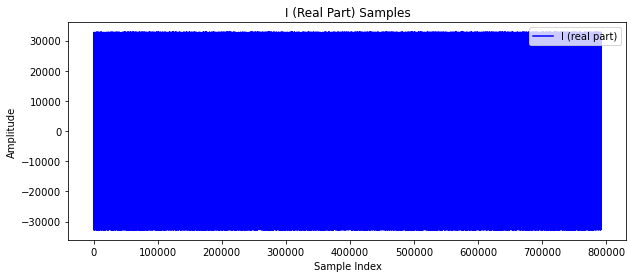

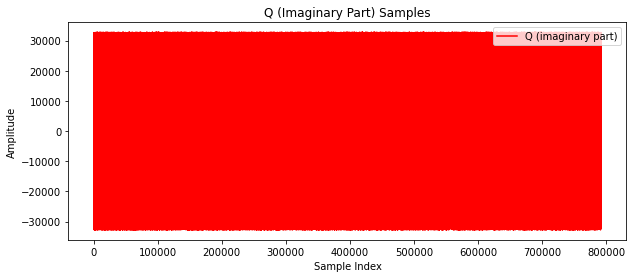

In [4]:
print(i)  # real part
print(q)  # imaginary part
import matplotlib.pyplot as plt

# Plot I (real part)
plt.figure(figsize=(10, 4))
plt.plot(i, label='I (real part)', color='b')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('I (Real Part) Samples')
plt.legend()
plt.show()

# Plot Q (imaginary part)
plt.figure(figsize=(10, 4))
plt.plot(q, label='Q (imaginary part)', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Q (Imaginary Part) Samples')
plt.legend()
plt.show()

In [7]:
import numpy as np

# 1) Load interleaved int16 values
raw = np.fromfile('/home/elahed/users/elahe/project_check/Datasets/neu_4f22xw93j/DATASET3_4_1/DATASET3_4_1/802.11ax/OTA20210721-201220_0.bin', dtype=np.int16)

# 2) Split into I and Q, every even index is I, odd is Q
i_samples = raw[0::2].astype(np.float32)
q_samples = raw[1::2].astype(np.float32)

# 3) Normalize from int16 → float32 in [-1,1]
i_samples /= 32768.0
q_samples /= 32768.0

# 4) Form complex waveform
iq = i_samples + 1j*q_samples

# Now `iq` is a 1‑D complex64 array you can feed into any DSP:
#   e.g. plt.specgram(iq), np.fft.fft(iq), etc.


In [8]:
print(i)  # real part
print(q)  # imaginary part
print(raw)  # original interleaved samples
print(len(i))  # number of I samples
print(len(q))  # number of Q samples
print(len(raw))  # total number of samples (I + Q)
print(iq)  # complex waveform
print(iq.dtype)  # should be complex64
print(iq.shape)  # should be (N,) where N is the number of samples
print(iq.size)  # should be the same as len(i) and len(q)
print(np.iscomplexobj(iq))  # should be True, confirming complex64 type
print(np.all(np.isfinite(iq)))  # should be True, confirming no NaNs

[ 16711.  14671.  -3570. ...   7553. -27499. -29708.]
[ 30751.  16242.  32321. ... -16474.  25074. -16447.]
[ 16711  30751  14671 ...  25074 -29708 -16447]
792320
792320
1584640
[ 0.50997925+0.93844604j  0.4477234 +0.4956665j  -0.10894775+0.98635864j
 ...  0.23049927-0.5027466j  -0.8392029 +0.76519775j
 -0.9066162 -0.5019226j ]
complex64
(792320,)
792320
True
True


In [9]:
import os
print(os.path.getsize('/home/elahed/users/elahe/project_check/Datasets/neu_4f22xw93j/DATASET3_4_1/DATASET3_4_1/802.11ax/OTA20210721-201220_0.bin'))

3169280
